# What is Dask?

Dask is a parallel computing framework that works on two levels:

* **High:** data collections which mirror `np.array`, `list` and `pd.DataFrame` except they operate in parallel on large datasets. 


* **Low:** task schedulers for executing task graphs in parallel. These act as an alternative to direct use of libraries such as `multiprocessing`.

<img src='img/collections-schedulers.png'>

### Mimicking the Numeric Python ecosystem

The high-level collections have the same functionality as their respective mirrors. For example, for a `dask.DataFrame` we can see a lot of similarities to `pandas`:

    import dask.DataFrame as dd                         import pandas as pd
    df = dd.read_csv('/path/to/any.csv')                df = pd.read_csv('/path/to/any.csv')
    df.groupby(df.cost).mean().compute()                df.groupby(df.cost).mean()

However, not all features can be transferred to dask. For instance, writing to csv is done in parts.

### Reading in some data

In [1]:
import dask
import dask.dataframe as dd
import pandas as pd

dates = ['Bench_Period', 'Period', 'EPISODE_ST', 'EPISODE_END', 'ADMDATE', 'DISCDATE', 'procedure_date_dt']
dt = {'OPCS_11': 'object', 'OPCS_12': 'object', 'ADM_MET': 'object'}

In [2]:
%time df = pd.read_csv('/Volumes/thesis-data/main.csv', parse_dates=dates, dtype=dt, low_memory=False)

CPU times: user 4min 33s, sys: 28.9 s, total: 5min 2s
Wall time: 5min 6s


In [3]:
%time ddf = dd.read_csv('/Volumes/thesis-data/main.csv', parse_dates=dates, dtype=dt, low_memory=False)

CPU times: user 606 ms, sys: 152 ms, total: 758 ms
Wall time: 1.77 s


### Why so fast?
Dask hasn't actually done any work yet, except for making a task graph:

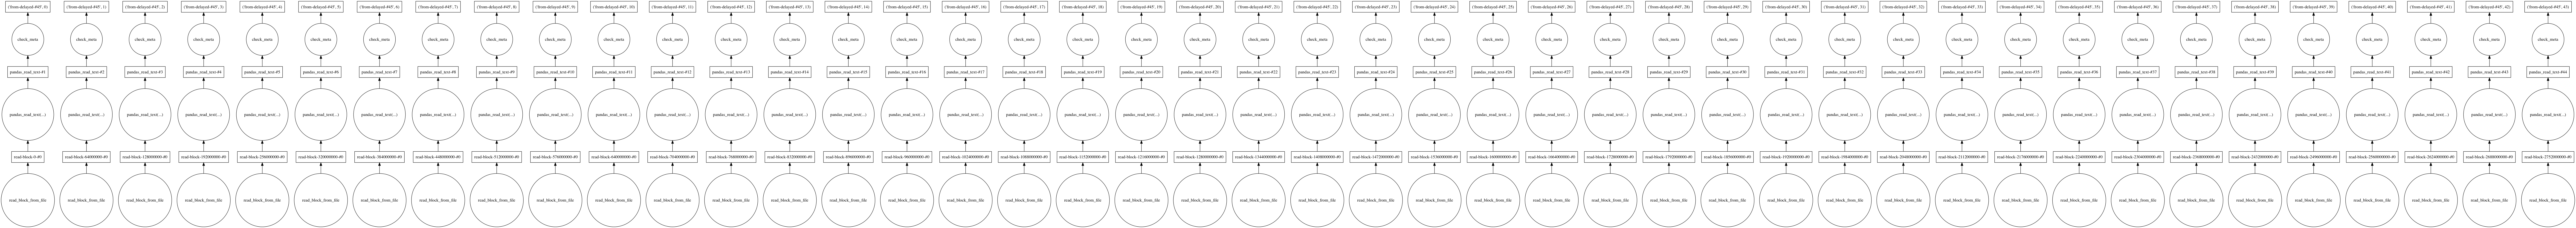

In [4]:
ddf.visualize()

We can run a scheduler on this graph by calling `.compute()`

In [5]:
%time ddf.compute()

CPU times: user 5min 37s, sys: 45.6 s, total: 6min 23s
Wall time: 3min 23s


,100x,10x,2x,5x,ACTIVITY,ACUITY,ADMDATE,ADM_MET,ADM_SOU,AMIPrim,...,WIP_FLG,consultant,end_ward,pasid,practice_code,procedure_code,procedure_date_dt,site1,south_north,start_ward
0,0.0,0.0,1.0,0.0,1.0,NaN,2013-09-29,21,NaN,0.0,...,NaN,BOLJM,80644,M0109110,W95086,U051,2013-09-29,PCH,North,80644
1,0.0,0.0,1.0,0.0,1.0,NaN,2013-01-08,21,NaN,0.0,...,NaN,DEWRI,63314,M2517965,W95006,999,NaT,RGH,South,63314
2,0.0,0.0,1.0,0.0,1.0,NaN,2014-05-02,11,NaN,0.0,...,NaN,PEMJM,63309,M1032814,W95025,T439,2014-05-02,RGH,South,63309
3,0.0,0.0,1.0,0.0,1.0,NaN,2013-10-28,21,NaN,0.0,...,NaN,EVAPM,63304,M2094448,W95058,U051,2013-10-28,RGH,South,63304
4,0.0,0.0,1.0,0.0,1.0,NaN,2013-04-30,21,NaN,0.0,...,NaN,ELHAS,63317,M2198081,W95027,999,NaT,RGH,South,63317
5,0.0,0.0,1.0,0.0,1.0,NaN,2013-12-11,22,NaN,0.0,...,NaN,ELHAS,63318,M2603928,W95062,999,NaT,RGH,South,63318
6,0.0,0.0,1.0,0.0,1.0,NaN,2013-10-24,11,NaN,0.0,...,NaN,SINAB,80617,M0024454,W95016,M459,2013-10-24,PCH,North,80617
7,0.0,0.0,1.0,0.0,1.0,NaN,2013-11-28,22,NaN,0.0,...,NaN,OKUOH,80631,M0312035,W95005,999,NaT,PCH,North,80631
8,0.0,0.0,0.0,1.0,1.0,NaN,2013-12-06,21,NaN,0.0,...,NaN,CONKP,80644,M0005885,W95016,999,NaT,PCH,North,80644
9,0.0,0.0,1.0,0.0,1.0,NaN,2014-04-02,21,NaN,0.0,...,NaN,WOOA,63301,M2067703,W95071,999,NaT,RGH,South,63301


### Plots - pandas is faster here

In [7]:
import matplotlib.pyplot as plt
import seaborn as sns
%matplotlib inline

CPU times: user 520 ms, sys: 469 ms, total: 990 ms
Wall time: 1.52 s


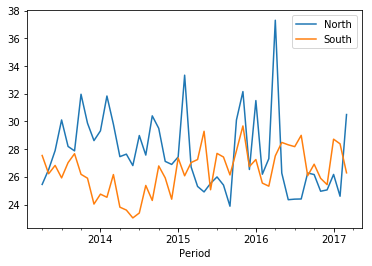

In [8]:
%%time 
df[(df.LOS > 14) & (df.south_north == 'North')].groupby(df.Period).LOS.mean().plot(label='North')
df[(df.LOS > 14) & (df.south_north == 'South')].groupby(df.Period).LOS.mean().plot(label='South')
plt.legend(loc='upper right');

In [ ]:
%%time
ddf.query('south_north == "North"').groupby('Period').LOS.mean().compute().plot(label='North')
ddf.query('south_north == "South"').groupby('Period').LOS.mean().compute().plot(label='South')
plt.legend(loc='upper right');

In [9]:
%%time
data_ = df[df.LOS > 14]
plt.figure(figsize=(200,100))
sns.boxplot(data=data_, x='NetCost', y='HRG_Subchapter', hue='site1');

/Users/henrywilde/anaconda3/envs/hdw-thesis/lib/python3.6/site-packages/seaborn/categorical.py:490: FutureWarning: remove_na is deprecated and is a private function. Do not use.
  box_data = remove_na(group_data[hue_mask])


CPU times: user 1.54 s, sys: 2.5 s, total: 4.04 s
Wall time: 4.49 s


CPU times: user 719 ms, sys: 25 ms, total: 744 ms
Wall time: 744 ms


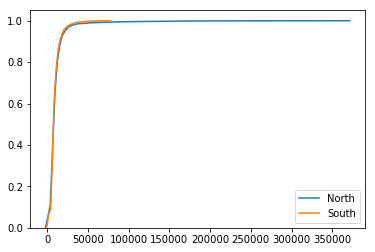

In [10]:
%%time
sns.kdeplot(data_[data_.south_north == 'North'].NetCost, cumulative=True, label='North')
sns.kdeplot(data_[data_.south_north == 'South'].NetCost, cumulative=True, label='South');

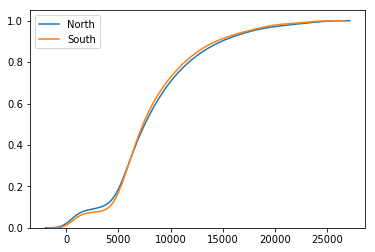

In [11]:
sns.kdeplot(data_[(data_.south_north == 'North') & (data_.NetCost < 25000)].NetCost, cumulative=True, label='North')
sns.kdeplot(data_[(data_.south_north == 'South') & (data_.NetCost < 25000)].NetCost, cumulative=True, label='South');

### Parallelisation with `dask.delayed`

One of the most useful elements of dask is `dask.delayed`. This can parallelise sequential code by use of the `@delayed` decorator or my calling a function as delayed, i.e. `delayed(some_func)(x)`.

In [12]:
from time import sleep
import dask.delayed as delayed

#### Sequential

In [13]:
def inc(x):
    sleep(1)
    return x + 1

def add(x, y):
    sleep(1)
    return x + y

In [14]:
%%time

x = inc(1)
y = inc(2)
z = add(x, y)

CPU times: user 3.97 ms, sys: 1.89 ms, total: 5.86 ms
Wall time: 3.01 s


#### Calling `delayed(inc)`

In [15]:
%%time

x = delayed(inc)(1)
y = delayed(inc)(2)
z = add(x, y)

CPU times: user 2.4 ms, sys: 1.32 ms, total: 3.72 ms
Wall time: 1 s


#### Using `@delayed`

In [16]:
@delayed
def inc(x):
    sleep(1)
    return x + 1

def add(x, y):
    sleep(1)
    return x + y

In [17]:
%%time

x = inc(1)
y = inc(2)
z = add(x, y)

CPU times: user 2.1 ms, sys: 1.32 ms, total: 3.42 ms
Wall time: 1.01 s


In [18]:
z

Delayed('add-642a0589ed7073e2198cb118dc85888c')

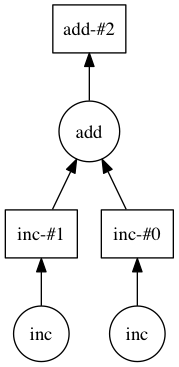

In [19]:
z.visualize()